# Load Data

In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from pandas.plotting import lag_plot, autocorrelation_plot
%run ../src/models/section_series.py
%matplotlib inline

In [3]:
series_loader = SectionSeriesLoader(
    img_shape=(200, 200),
    SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/*.npz')

In [4]:
%%time
fuku_series = series_loader.load({'lat':37.42,'lng':141.03})
tocopilla_series = series_loader.load({'lat':-22.09,'lng':-70.19})
maule_series  = series_loader.load( {'lat':-35.52,'lng':-71.57})

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121994.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121995.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121996.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141997.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141998.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141999.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F142000.v4b_web.stable_lights.avg_vis.tif.npz
Loading 

# Notable Natural Disasters

In this section we take a closer look at some individual major natural disasters. We aim to analyse these shocks and investigate the recovery of the affected areas. 

## Rich vs Poor

### Tocopila and Maule Earthquakes

In 2007 an earthquake of magnitude 7.7 hit Tocopilla in the more prosperous north of Chile. 3 years later and an 8.8 magnitude earthquake devastated the poorer Maule region. While Tocopilla, in the Antofogasta region, is the highest ranked Chilean region by GDP (PPP) per capita contrasts to Maule being the third lowest in Chile. While both earthquakes caused serious destruction in both areas, we try to examine the recovery of each region. To compare the effects of the two earthquakes, it is estimated that 14.8% of the population in Tocopilla were left homeless by the disaster in 2007, while in Maule in 2010 this figure is estimated at 20.4%, figures from the . We aim to find, using our light data, if the more prosperous region recovers from the destruction at a quicker rate.

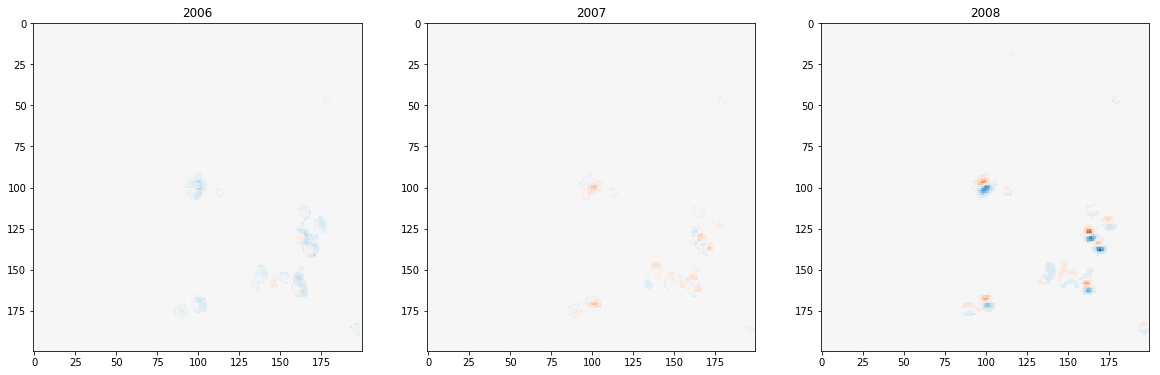

In [8]:
max_abs = max(abs(tocopilla_series.max()), abs(tocopilla_series.min()))
plt.subplots(1,3,figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(tocopilla_series[10], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2006')
plt.subplot(1,3,2)
plt.imshow(tocopilla_series[11], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2007')
plt.subplot(1,3,3)
plt.imshow(tocopilla_series[12], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2008')
plt.show()

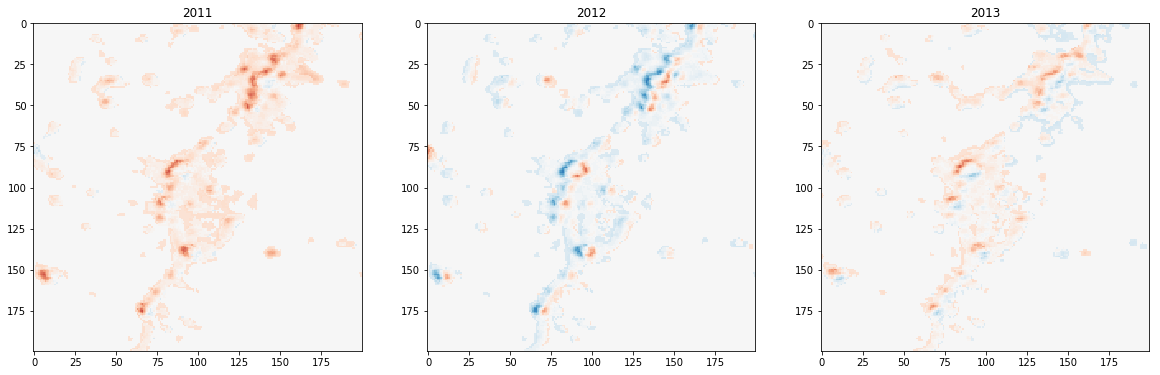

In [9]:
max_abs = max(abs(maule_series.max()), abs(maule_series.min()))
plt.subplots(1,3,figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(maule_series[17], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2011')
plt.subplot(1,3,2)
plt.imshow(maule_series[18], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2012')
plt.subplot(1,3,3)
plt.imshow(maule_series[19], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2013')
plt.show()

From simply looking at the images of Tocopilla, it is quite difficult to observe the effects of the earthquake from the light differences. While the 2010 earthquake in Maule shows much clearer effects. As expected we have the immediate decrease in luminosity, represented by red, following the earthquake. Followed by a bounce back, in blue, the following year.

In [16]:
tocopilla_series_means = tocopilla_series.mean(axis=(1,2))
df_tocopilla_series = pd.DataFrame({
    'mean_change': tocopilla_series_means
}, index=range(1993,2014))

maule_series_means = maule_series.mean(axis=(1,2))
df_maule_series = pd.DataFrame({
    'mean_change': maule_series_means
}, index=range(1993,2014))

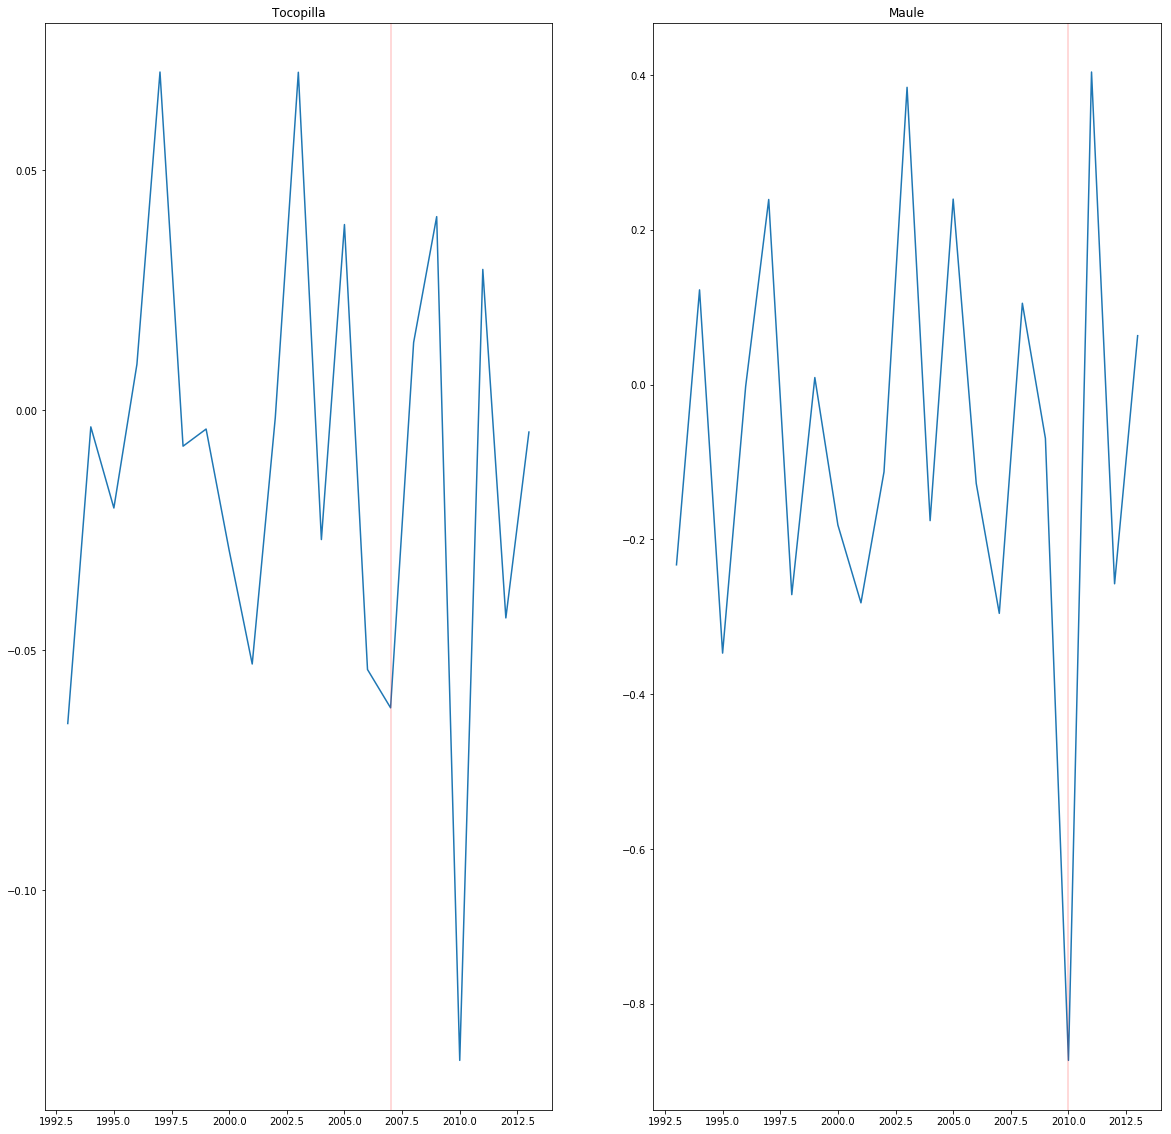

In [20]:
plt.subplots(1,2,figsize=(20,20))
plt.subplot(1,2,1)
plt.plot(df_tocopilla_series['mean_change'])
plt.title('Tocopilla')
plt.axvline(x=2007, c='r', lw=.3)
plt.subplot(1,2,2)
plt.plot(df_maule_series['mean_change'])
plt.title('Maule')
plt.axvline(x=2010, c='r', lw=.3)
plt.show()

These two graphs show the absolute change in the mean luminosity of the areas over time, with the red line indicating the time of the earthquake. We can see that the 2010 disaster in Maule had a much larger effect on light levels in the region than in the Tocopilla quake. Despite this huge drop in light levels, in the year following the disastersm both areas see recovery. In the case of Tocopilla, the mean luminosity drops by 0.06195 in the year of the earthquake and in the following year it grows by 0.01415. While in the case of Maule, the mean light levels drop by -0.873175 and recovers by 0.403875. Although the magnitudes of the variations are of different sizes in the two cases, we can see that Maule regains a larger proportion of its luminosity than Tocopilla. This is interesting as it would have been reasonable to expect the more prosperous region of Tocopilla to recover more of its light however, this is not the case. One explanation for this could be the hmanitarian aid provided. In 2010, one week after the earthquake, Chile formally requested international aid. The earthquake and following tsunami in Maule caused a many more deaths and much more destruction, as can be seen in the larger drop in light levels. The number of fatalities attracted much international attention, and in turn aid. This could be one explanation for the recovery of the Maule region.

However, we can note thath the earthquake in Maule caused a serious outlier in the drop in lighting, this is not the case in Tocopilla. Tocopilla actually has a larger drop in luminosity in 2010, when there is no earthquake in the region. We can see a shift in the light, with no disasters. How much of this change in light can we attribute to the natural disaster rather than simply the variance in light between the yearly picture.

### Hurricane Katrina

In [23]:
%%time
kat_series = series_loader.load({'lat':29.95,'lng':-90.07})

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121994.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121995.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121996.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141997.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141998.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141999.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F142000.v4b_web.stable_lights.avg_vis.tif.npz
Loading 

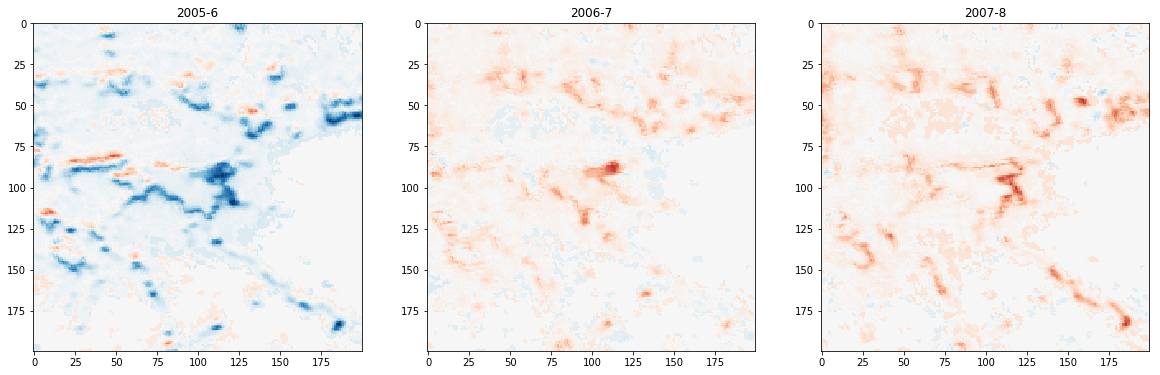

In [27]:
max_abs = max(abs(kat_series.max()), abs(kat_series.min()))
plt.subplots(1,3,figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(kat_series[12], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2005-6')
plt.subplot(1,3,2)
plt.imshow(kat_series[13], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2006-7')
plt.subplot(1,3,3)
plt.imshow(kat_series[14], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2007-8')
plt.show()

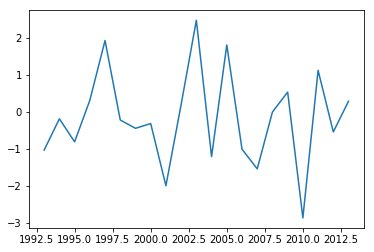

In [26]:
kat_series_means = kat_series.mean(axis=(1,2))
df_kat_series = pd.DataFrame({
    'mean_change': kat_series_means
}, index=range(1993,2014))

plt.plot(df_kat_series['mean_change'])

## Fukushima Daichii Nuclear Disaster

On the 11th of March 2011 the most powerful earthquake ever recorded in Japan, a 9.1 magnitude shock, originated 70km off the east coast. This triggered a tsunami with waves reaching 40m tall. When these waves struck the Fukushima Daichii Nuclear Power Plant there were 3 nuclear meltdowns resulting in radioactive materials being released in chemical explosions. 

Not only is Fukushima an interesting example of recovery after a serious disaster, but also a prime example of avoidance behaviour. Avoidance behaviour is the act of a person removing themselves froman unpleasant situation. Classic examples of avoidance behaviour would be the movement away from polluted areas, people will avoid pollution when chosing where to live or even their routes to destinations. In the case of Fukushima we effectively have enforced avoidance. Within the first two weeks of the accident all residents in a 30km of the plant were advised to leave their homes. After one moneth a complete "no-go" zone was introduced around the plant. This "no-go" zone is still in place today.

From the satellite data we aim to investigate several aspects of the Fukushima disaster. The first being, how clearly can the effects of, and recovery from, the meltdown be seen. Another, would be, is there evidence of the avoidance behaviour from Fukushima and the surrounding area. 

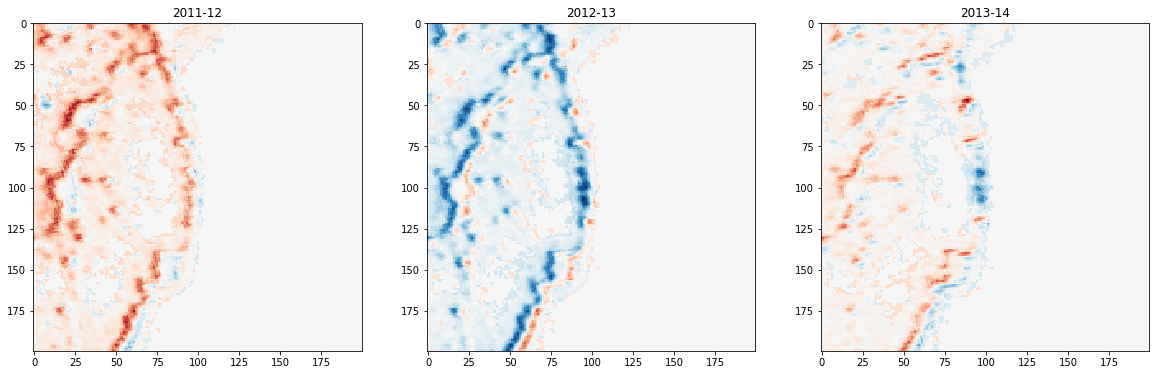

In [28]:
max_abs = max(abs(fuku_series.max()), abs(fuku_series.min()))
plt.subplots(1,3,figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(fuku_series[17], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2011-12')
plt.subplot(1,3,2)
plt.imshow(fuku_series[18], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2012-13')
plt.subplot(1,3,3)
plt.imshow(fuku_series[19], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2013-14')
plt.show()

These images show the change in light levels over the year in the area around the Fukushima disaster with the power plant in the centre. In the images red coulouring represents a decrease in the absolute value, while blue shows an increase. A darker colour shows a larger change in light.

The year of the disaster, 2011, unsurprisingly shows almost exclusively red clourings. In 2012, we see an influx of lights to the recovery area. This is common in most of the disasters we have studied. However, we see some rather surprising information from this 2012 image and also the 2013 image. In 2012 we see some of the darkest blue colour in the centre of the image, exactly corresponding to the location of the power plant. This is despite the fact that in 2013, there is still the "no-go" zone and evacuated areas. Perhaps more surprising is the 2013 image. In most of the lit areas in 2013 there is a decrease in luminosity, except in one area, the location of the power plant.

Unfortunately the light data only extends to 2013. We can see the devastation and immediate recovery, but we cannot fully see how the avoidance behaviour of the population. The 2013 data shows more movement away from the area. We could now investigate the cities around the Fukushima region to find if their luminosty surges with the influx of evacuees from the disaster. 

In [30]:
%%time
fuku_city_series = series_loader.load({'lat':37.76,'lng':140.47})

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121994.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121995.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121996.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141997.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141998.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141999.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F142000.v4b_web.stable_lights.avg_vis.tif.npz
Loading 

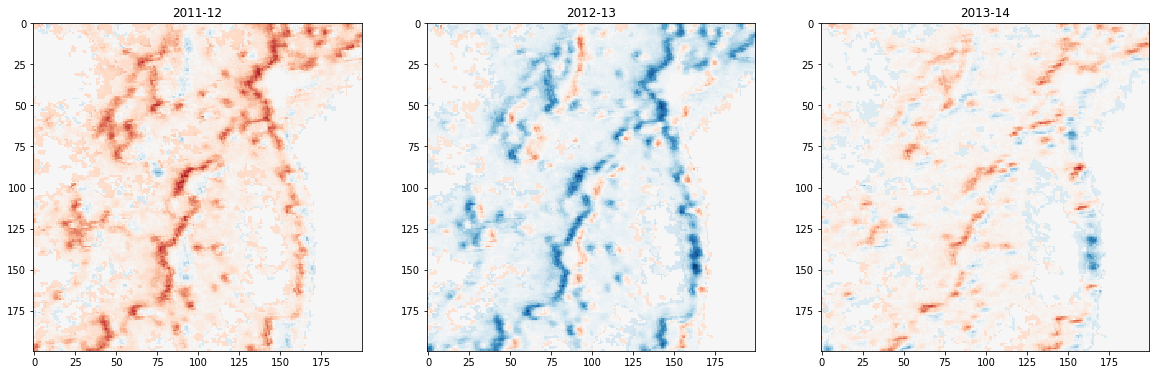

In [31]:
max_abs = max(abs(fuku_city_series.max()), abs(fuku_city_series.min()))
plt.subplots(1,3,figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(fuku_city_series[17], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2011-12')
plt.subplot(1,3,2)
plt.imshow(fuku_city_series[18], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2012-13')
plt.subplot(1,3,3)
plt.imshow(fuku_city_series[19], vmin=-max_abs, vmax=max_abs, cmap='RdBu')
plt.title('2013-14')
plt.show()